# DSCI100 Group 32 Project Proposal


## User Knowledge Modeling Data Set: Using Regression to Predict Student Exam Performance by Study Time 


##### Authors: Xue Wang, Renee Li, Selina Wang

## Introduction:

In this study, we will be exploring and predicting students’ exam performance about Electrical DC Machines based on their study time. The question we will try to answer with our project is: What will a student’s exam performance be based on their study time? In our project, we will be using the User Knowledge Modeling Data Set, which has a total of 5 variables observed about students, in addition to the classified knowledge level of user (UNS): 

* STG: the degree of study time for goal object materials
* SCG: the degree of repetition number of user for goal object materials 
* STR: the degree of study time of user for related objects with goal object
* LPR: the exam performance of user for related objects with goal object
* PEG: the exam performance of user for goal objects

These variables were drawn from students’ learning-related activities on the web. The data was also already tidy and pre-divided into training and testing subsets.


In [66]:
#The library we need for reading and analyzing the dataset.
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(readxl)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

#### Reading the Data

In [67]:
# Reading the dataset from the online data folder.
# data_1 is the training data selected from sheet 2.
# data_2 is the testing data selected from sheet 3.
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, "data.xls")
data_1 <- read_excel("data.xls", sheet = 2) %>%
select(STG,SCG,STR,LPR,PEG,UNS)
data_1

data_2 <- read_excel("data.xls", sheet = 3)%>%
select(STG,SCG,STR,LPR,PEG,UNS)
data_2 

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


* STG: the degree of study time for goal object materials
* SCG: the degree of repetition number of user for goal object materials 
* STR: the degree of study time of user for related objects with goal object
* LPR: the exam performance of user for related objects with goal object
* PEG: the exam performance of user for goal objects
* UNS: the knowledge level of user

We can see from the above tables that the data is already tidy, since each row is a single observation, each column is a single variable, and each value is a single cell. We do not need to do any further tidying. 

We can also see from above that the proportion of the training data is around 64%, while the testing data is around 36%.

#### Determing the Predictor(s) and the Explanatory Variable(s).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



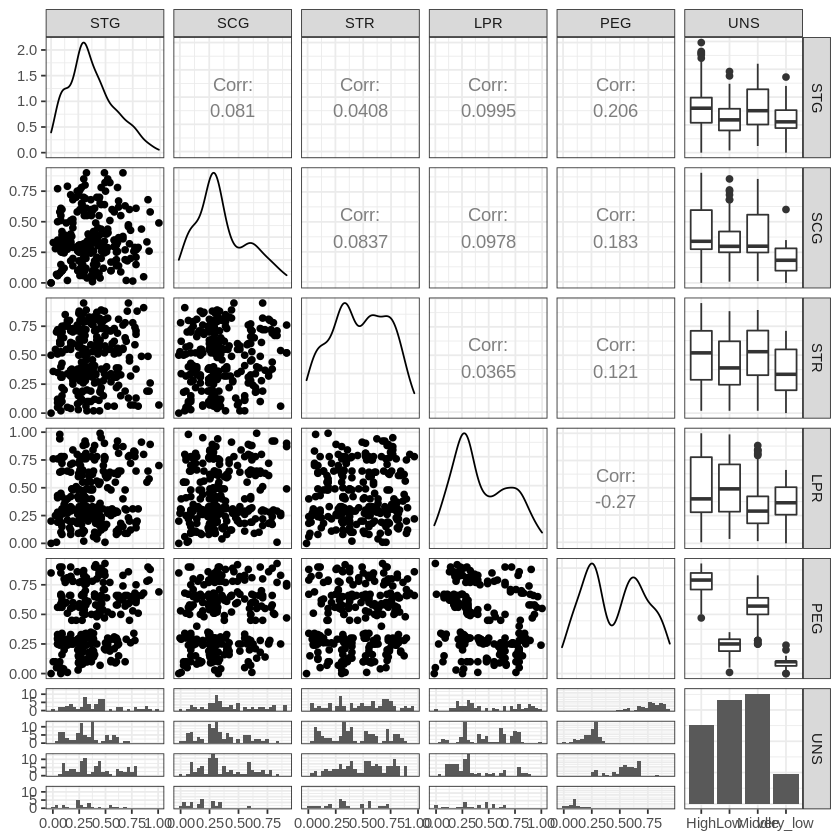

In [65]:
#comparing distributions of each predictor variable
predictors <- ggpairs(data_1) + theme_bw()
predictors

To choose the variables we wish to use as predictors, we compared the four variables to PEG (exam performance) using a ggpairs visualization.

Although LPR has the highest correlation coefficient, it is too similar to PEG for the purposes of our research. It would be beneficial for us to observe the relationship between the variable with the second highest coefficient (STG) and PEG instead.

From the ggpairs that we plotted above, we can see that the correlation coeffiecient between PEG and STG is slightly higher than that of STR and SCG.

In regards to why we are only choosing one predictor, it would be extremely difficult (within the scope of this course) to plot the final results, since all of our variables/columns (except UNS) are numerical, and PEG (which is what we are trying to predict) is also numerical. 

Therefore, the one predictor we have chosen to use in our regression is STG. 

#### Cleaning and Wrangling the Data

In [48]:
# Wrangling the data and removing irrelevant columns


# Keeping just STG and PEG from the training set.
user_training <- data_1 %>%
select(STG,PEG) 
user_training

#Keeping just STG and PEG from the testing set.
user_testing <-data_2 %>%
select(STG,PEG)
user_testing

STG,PEG
<dbl>,<dbl>
0.00,0.00
0.08,0.90
0.06,0.33
⋮,⋮
0.54,0.77
0.50,0.26
0.66,0.74


STG,PEG
<dbl>,<dbl>
0.00,0.05
0.05,0.14
0.08,0.85
⋮,⋮
0.56,0.32
0.66,0.57
0.68,0.24


#### Summarizing the Data

In [64]:
#finding the means of the predictor and explanatory variables we plan to use in our analysis.
means <- user_training %>%
map_df(mean,na.rm = TRUE)
means

#finding the maximum of the predictor and explanatory variables we plan to use in our analysis.
maximum <- user_training %>%
map_df(max,na.rm =TRUE)
maximum

#finding the minimum of the predictor and explanatory variables we plan to use in analysis.
minimum <- user_training %>%
map_df(min,na.rm =TRUE)
minimum

#finding the number of observations in the predictor and explanatory variables we plan to use in analysis.
observations <- user_training %>%
summarize(n = n())
observations

<0 x 0 matrix>

STG,PEG
<dbl>,<dbl>
0.99,0.93


STG,PEG
<dbl>,<dbl>
0,0


n
<int>
258


In [55]:
#finding how many rows have missing data
NA_STG_train<-sum(is.na(user_training$STG))
NA_STG_train

NA_PEG_train<-sum(is.na(user_training$PEG))
NA_PEG_train

NA_STG_test<-sum(is.na(user_testing$STG))
NA_STG_test

NA_PEG_test<-sum(is.na(user_testing$PEG))
NA_PEG_test

[1] 0

[1] 0

[1] 0

[1] 0

As indicated above, there is no missing data in both the STG and PEG columns in our training and testing datasets.

#### Visualizing the Data

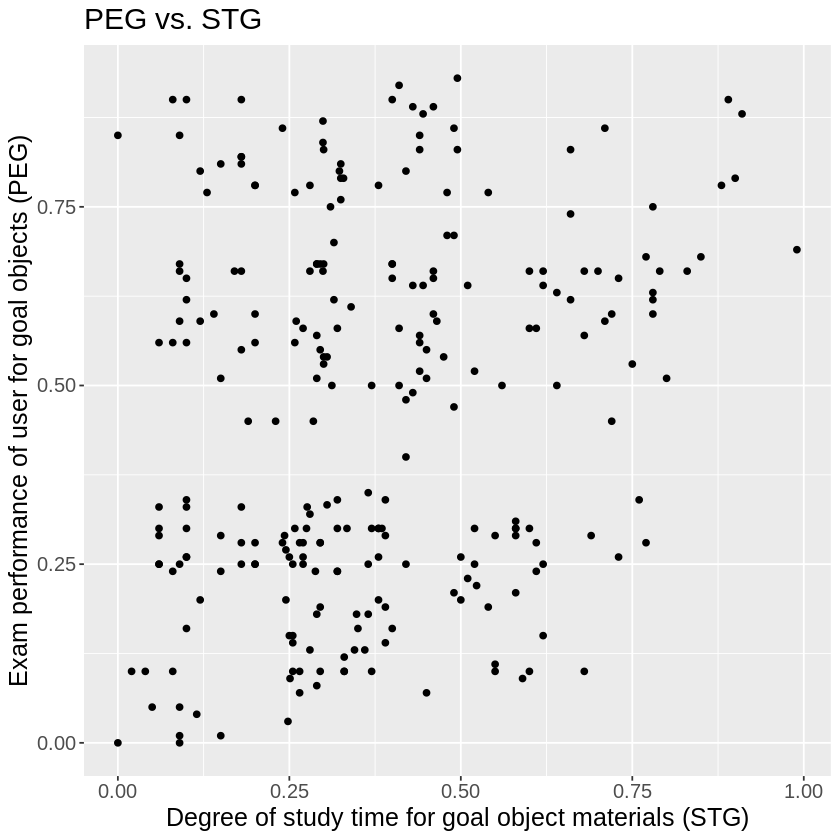

In [38]:
#refer back to the ggpairs plot for additional visualization
#plotting PEG against STG
peg_stg <- user_training %>%
    ggplot(aes(x=STG, y=PEG))+ 
    geom_point()+
    labs(y = "Exam performance of user for goal objects (PEG)" , x = "Degree of study time for goal object materials (STG)", title = "PEG vs. STG")+
    theme(text=element_text(size=15))
peg_stg

### Methods

We will be using regression to predict a student’s exam performance(PEG) based on their study time(STG). Since we are predicting a numerical value instead of a categorical value, we must use regression to evaluate and create a prediction. We will train our regression with our training data and assess its accuracy with our testing data.

After plotting PEG against STG, we can also see that the data points do not follow a clear or direct relationship. From what we can see so far, k-nn regression seems to be the better choice as it allows for more flexibility, but we will test both the accuracies of k-nn and linear regression, and compare to find the best approach. 

To visualize our results, we will plot our predictions as a line using geom_smooth overlaid our testing data to see the relationship between the two. The x-axis will be STG, and the y-axis will be PEG.

### Expected Outcomes and Significance

We expect to find a positive, linear relationship between PEG and STG. As a student spends more time studying, they should perform better. Our findings will help students assess how well they are performing in comparison to the time they are spending studying. This will be beneficial to find the best study methods and learn how to study more efficiently. Some future questions to consider:

* How much time should a student be spending studying to improve exam performance?
* How do other factors (such as repetition, knowledge level, etc.) contribute to exam performance?